# Импорты

In [1]:
import pandas as pd
import numpy as np

# Данные для линейной регрессии

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=14, n_informative=10, noise=15, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13
0,1.191261,-0.308960,0.675137,-1.460501,0.053059,-1.886129,2.710794,-1.716033,0.865290,0.138078,-0.063745,-2.104583,-0.476876,1.677116
1,1.071476,-1.424766,-1.109750,-0.457677,0.399997,1.587401,-1.547570,0.323247,0.165859,-0.302097,0.203944,-0.212452,0.836991,0.368498
2,-0.045929,1.868603,-0.016568,-0.484258,1.089905,-1.147160,0.590744,0.683325,-0.571184,-0.802199,-0.220114,0.034808,0.043829,0.955803
3,-1.487154,2.220322,0.718332,1.682888,-0.420986,-0.054746,1.900832,-0.101198,0.090042,-0.202924,0.340865,0.606237,-0.037008,-0.841048
4,0.344054,0.657763,0.348342,-0.417430,-0.589112,1.057814,-0.487705,-0.897830,-0.935596,-1.186993,1.074333,-0.069532,-0.177918,-0.912811


# Данные для логистической регрессии

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=14, n_informative=10, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13
0,0.212170,0.588157,0.373931,-1.213137,-0.431857,-1.805413,0.374652,-0.328778,1.662872,0.682909,-0.635783,-0.096290,-0.706476,1.475155
1,-2.136309,-0.340340,-1.518135,2.791709,-0.348785,-0.697299,-3.616860,-0.644757,-3.150791,0.153453,-1.975852,1.927038,-0.225723,1.335919
2,-2.995246,0.418912,-1.147293,4.705204,0.109306,-0.134241,0.297226,2.162918,-6.801806,1.573732,0.234367,-0.348181,-3.033989,-2.326364
3,-4.434309,1.959684,0.313601,0.497666,0.864826,2.565846,-1.654235,-1.603219,1.411960,-0.621943,-2.532930,-0.387911,0.313242,4.148565
4,-6.564804,0.302972,0.394640,1.189341,-2.472628,4.819816,-1.126806,-1.453735,-2.691496,-0.259630,-1.587911,-0.205920,-0.589160,0.759591


# 2.1 Линейная регрессия

## Обучение, предсказание

In [4]:
# Создайте класс MyLineReg.

# Данный класс при инициализации должен принимать на вход два параметра:

# n_iter — количество шагов градиентного спуска.
# По-умолчанию: 100
# learning_rate — коэффициент скорости обучения градиентного спуска.
# По-умолчанию: 0.1
# Все переданные (или дефолтные) параметры должны быть сохранены внутри класса.

# При обращении к экземпляру класса (или при передачи его в функцию print) необходимо распечатать строку по следующему шаблону (строго в таком виде):

# MyLineReg class: n_iter=<n_iter>, learning_rate=<learning_rate>

class MyLineReg():
    def __init__(self, n_iter=100, learning_rate=0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        
    def __str__(self):
        return f'{__class__.__name__}: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
d = MyLineReg(n_iter=10, learning_rate=0.5)
print(d)

MyLineReg: n_iter=10, learning_rate=0.5


In [5]:
class MyLineReg():
    def __init__(self, **kwargs):
        self.n_iter = kwargs.get("n_iter")
        self.learning_rate = kwargs.get("learning_rate")
       
    def __repr__(self):
        return f"MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}"

d = MyLineReg(n_iter=10, learning_rate=0.5)
print(d)

MyLineReg class: n_iter=10, learning_rate=0.5


In [6]:
# В инициализатор класса добавить новый параметр — weights — который будет хранить веса модели. По умолчанию он ничего не содержит.
# Вам необходимо реализовать метод fit в Вашем классе. Данный метод должен делать следующее:
# На вход принимать три атрибута:
# - X — все фичи в виде датафрейма пандаса.
#   Примечание: даже если фича будет всего одна это все равно будет датафрейм, а не серия.
# - y — целевая переменная в виде пандасовской серии.
# - verbose — указывает на какой итерации выводить лог. Например, значение 10 означает, 
# что на каждой 10 итерации градиентного спуска будет печататься лог. Значение по умолчанию: False (т.е. ничего не выводится).
# Дополнить переданную матрицу фичей единичным столбцом слева.
# Определить сколько фичей передано и создать вектор весов, состоящий из одних единиц соответствующей длинны: т.е. количество фичей + 1.
# Дальше в цикле (до n_iter):
# - Предсказать y^
# - Посчитать ошибку (MSE)
# - Вычислить градиент
# - Сделать шаг размером learning rate в противоположную от градиента сторону
# - Сохранить обновленные веса внутри класса
# В процессе обучения необходимо выводить лог, в котором указывать номер итерации и значение функций потерь:
# start | loss: 42027.65
# 100 | loss: 1222.87
# 200 | loss: 232.17
# 300 | loss: 202.4
# где start - значении функции потерь до начала обучения. Далее выводится каждое i-ое значение итерации переданное в параметре verbose. 
# Если verbose = False, то лог не выводится вовсе.
# З.Ы. Данный вывод никак проверяться не будет. Он в основном нужен для отладки. 
# Поэтому можете модифицировать его внешний вид под свои нужды.
# Метод ничего не возвращает.
# Необходимо реализовать метод get_coef, который будет возвращать значения весов в виде вектора NumPy, 
# начиная со второго значения. Первое значение нам не нужно, потому что оно соответствует фиктивной фиче (единичке). 
# Все же остальные могут использоваться для оценки важности фичей.


class MyLineReg():
    def __init__(self, n_iter=100, learning_rate=0.1, weights=None):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = weights
       
    def __repr__(self):
        return f'MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose=False):
        X = np.c_[np.ones(len(X)), X.values]
        n_features = X.shape[1]
        self.weights = np.ones(n_features)

        if verbose:
            y_pred = X @ self.weights
            loss = np.mean(np.square(y_pred - y))
            print(f'start | loss: {loss}')

        for i in range(self.n_iter):
            y_pred = X @ self.weights
            loss = np.mean(np.square(y_pred - y))
            grad = 2 * X.T @ (y_pred - y) / len(y_pred)
            self.weights -= self.learning_rate * grad
        
            if verbose and (i+1) % verbose == 0:
                print(f'{i+1} | loss: {loss}')

    def get_coef(self):
        return self.weights[1:]
    
d = MyLineReg(n_iter=100, learning_rate=0.1)
print(d)

d.fit(X, y, 10)

MyLineReg class: n_iter=100, learning_rate=0.1
start | loss: 91.45176340124303
10 | loss: 88938926504645.22
20 | loss: 3.199179195264973e+27
30 | loss: 1.1507613061736301e+41
40 | loss: 4.139347948206334e+54
50 | loss: 1.4889448701827188e+68
60 | loss: 5.355811722481788e+81
70 | loss: 1.926513182664268e+95
80 | loss: 6.929767578273576e+108
90 | loss: 2.4926732462053665e+122
100 | loss: 8.966274614791588e+135


In [7]:
# Добавьте в класс MyLineReg метод predict. Данный метод должен делать следующее:

# На вход принимать матрицу фичей в виде датафрейма пандаса.
# Дополнять матрицу фичей единичным вектором (первый столбец).
# Возвращать вектор предсказаний.
# Напомню, что предсказание выполняется следующим образом y^ = XW

class MyLineReg():
    def __init__(self, n_iter=100, learning_rate=0.1, weights=None):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = weights
       
    def __repr__(self):
        return f'MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose=False):
        X = np.c_[np.ones(len(X)), X.values]
        n_features = X.shape[1]
        self.weights = np.ones(n_features)

        if verbose:
            y_pred = X @ self.weights
            loss = np.mean(np.square(y_pred - y))
            print(f'start | loss: {loss}')

        for i in range(self.n_iter):
            y_pred = X @ self.weights
            loss = np.mean(np.square(y_pred - y))
            grad = 2 * X.T @ (y_pred - y) / len(y_pred)
            self.weights -= self.learning_rate * grad
        
            if verbose and (i+1) % verbose == 0:
                print(f'{i+1} | loss: {loss}')

    def get_coef(self):
        return self.weights[1:]
    
    def predict(self, X: pd.DataFrame):
        X = np.c_[np.ones(len(X)), X.values]
        y_pred = X @ self.weights
        return np.sum(y_pred)
        
d = MyLineReg(n_iter=100, learning_rate=0.1)
print(d)

d.fit(X, y, 10)


MyLineReg class: n_iter=100, learning_rate=0.1
start | loss: 91.45176340124303
10 | loss: 88938926504645.22
20 | loss: 3.199179195264973e+27
30 | loss: 1.1507613061736301e+41
40 | loss: 4.139347948206334e+54
50 | loss: 1.4889448701827188e+68
60 | loss: 5.355811722481788e+81
70 | loss: 1.926513182664268e+95
80 | loss: 6.929767578273576e+108
90 | loss: 2.4926732462053665e+122
100 | loss: 8.966274614791588e+135


## Метрики

In [8]:
# Добавьте в класс MyLineReg параметр metric, который будет принимать одно из следующих значений:
# - mae
# - mse
# - rmse
# - mape
# - r2
# По умолчанию: None
# При обучении добавьте в вывод расчет метрики:
# start | loss: 42027.65 | <metric_name>: 234.65
# 100 | loss: 1222.87 | <metric_name>: 114.35
# 200 | loss: 232.17 | <metric_name>: 58.2
# 300 | loss: 202.4 | <metric_name>: 46.01
# Если метрика не задана, то ничего дополнительно выводить не нужно.
# Добавьте метод get_best_score, который возвращает последнее значение метрики (т.е. уже полностью обученной модели).

class MyLineReg():
    def __init__(self, n_iter=100, learning_rate=0.1, weights=None, metric=None):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = weights
        self.metric = metric

    def __repr__(self):
        return f'MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
    def get_metric(self, y_pred, y):
        if self.metric == 'mae':
            m = np.sum(np.abs(y - y_pred)) / len(y)
        elif self.metric == 'mse':
            m = np.sum(np.square(y - y_pred)) / len(y)
        elif self.metric == 'rmse':
            m = np.sqrt(np.sum(np.square(y - y_pred)) / len(y))
        elif self.metric == 'mape':
            m = np.sum(np.abs((y - y_pred) / y)) * 100 / len(y)
        elif self.metric == 'r2':
            m = 1 - np.sum(np.square(y - y_pred)) / np.sum(np.square(y - np.mean(y)))
        return m
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose=False):
        global met
        X = np.c_[np.ones(len(X)), X.values]
        n_features = X.shape[1]
        self.weights = np.ones(n_features)

        if verbose:
            y_pred = X @ self.weights
            loss = np.mean(np.square(y_pred - y))
            if self.metric:
                y_pred = X @ self.weights
                met = self.get_metric(y_pred, y)
                print(f'start | loss: {loss} | {self.metric}: {met}')
            else:
                print(f'start | loss: {loss}')

        for i in range(self.n_iter):
            y_pred = X @ self.weights
            loss = np.mean(np.square(y_pred - y))
            grad = 2 * X.T @ (y_pred - y) / len(y_pred)
            self.weights -= self.learning_rate * grad
            
            if self.metric:
                y_pred = X @ self.weights
                met = self.get_metric(y_pred, y)
        
            if verbose and (i+1) % verbose == 0:
                if self.metric:
                    print(f'{i+1} | loss: {loss} | {self.metric}: {met}')
                else:
                    print(f'{i+1} | loss: {loss}')

    def get_best_score(self):
        return met

    def get_coef(self):
        return self.weights[1:]
    
    def predict(self, X: pd.DataFrame):
        X = np.c_[np.ones(len(X)), X.values]
        y_pred = X @ self.weights
        return np.sum(y_pred)
        
d = MyLineReg(n_iter=100, learning_rate=0.1, metric='rmse')
print(d)

d.fit(X, y, 10)

MyLineReg class: n_iter=100, learning_rate=0.1
start | loss: 91.45176340124303 | rmse: 9.563041535057925
10 | loss: 88938926504645.22 | rmse: 44910022.82435843
20 | loss: 3.199179195264973e+27 | rmse: 269349775318242.34
30 | loss: 1.1507613061736301e+41 | rmse: 1.6154367533440293e+21
40 | loss: 4.139347948206334e+54 | rmse: 9.688650755217318e+27
50 | loss: 1.4889448701827188e+68 | rmse: 5.810809569749962e+34
60 | loss: 5.355811722481788e+81 | rmse: 3.4850577968986146e+41
70 | loss: 1.926513182664268e+95 | rmse: 2.090178262070718e+48
80 | loss: 6.929767578273576e+108 | rmse: 1.253593318056539e+55
90 | loss: 2.4926732462053665e+122 | rmse: 7.518479335437835e+61
100 | loss: 8.966274614791588e+135 | rmse: 4.509240014540059e+68


In [9]:
d.get_best_score()

4.509240014540059e+68

In [10]:
class MyLineReg:
    def __init__(self, n_iter: int = 100, learning_rate: float = 0.1, metric: str = None) -> None:
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self._weights = None
        self.metric = metric

    def __str__(self) -> str:
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)

    @staticmethod
    def _mae(y_true: np.array, y_pred: np.array):
        return (y_true - y_pred).abs().mean()

    @staticmethod
    def _mse(y_true: np.array, y_pred: np.array):
        return (y_true - y_pred).pow(2).mean()

    @staticmethod
    def _rmse(y_true: np.array, y_pred: np.array):
        return np.sqrt((y_true - y_pred).pow(2).mean())

    @staticmethod
    def _mape(y_true: np.array, y_pred: np.array):
        return 100 * ((y_true - y_pred) / y_true).abs().mean()

    @staticmethod
    def _r2(y_true: np.array, y_pred: np.array):
        return 1 - (y_true - y_pred).pow(2).sum() / ((y_true - y_true.mean()).pow(2).sum())

    def get_best_score(self):
        return self.score

    def fit(self, x: pd.DataFrame, y: pd.Series, verbose: int) -> None:
        x = pd.concat([pd.Series([1] * x.shape[0], index=x.index), x], axis=1).values
        self._weights = pd.Series([1.] * x.shape[1]).values
        for i in range(self.n_iter):
            y_hat = self._weights @ x.T
            mse = (y_hat - y).pow(2).mean()
            grad = (2 / y.shape[0]) * (y_hat - y) @ x
            self._weights -= self.learning_rate * grad
            if self.metric:
                self.score = getattr(self, '_' + self.metric)(y, x @ self._weights)
            if verbose and i % verbose == 0:
                if self.metric:
                    print(f'{i} | loss: {mse} | {self.metric}: {self.score}')
                else:
                    print(f'{i} | loss: {mse}')

    def get_coef(self):
        return self._weights[1:]

    def predict(self, x: pd.DataFrame):
        x = pd.concat([pd.Series([1] * x.shape[0], index=x.index), x], axis=1).values
        return x @ self._weights

## Регуляризация

In [11]:
# Добавьте в класс MyLineReg три параметра:
# reg – принимает одно из трех значений: l1, l2, elasticnet
# По умолчанию: None
# l1_coef – принимает значения от 0.0 до 1.0
# По умолчанию: 0
# l2_coef – принимает значения от 0.0 до 1.0
# По умолчанию: 0
# Добавьте регуляризацию к вычислению лоса.
# Добавьте регуляризацию к вычислению градиента.
# Примечания:

# Для вычисления регуляризации L1 вам нужно задать reg="l1" и указать только l1_coef.
# Для вычисления L2 вам нужно задать reg="l2" и указать только l2_coef.
# Для вычисления Elasticnet вам нужно задать reg="elasticnet" и указать оба параметра l1_coef и l2_coef.

class MyLineReg():
    def __init__(self, n_iter=100, learning_rate=0.1, weights=None, reg=None, l1_coef=0, l2_coef=0):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = weights
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
       
    def __repr__(self):
        return f'MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose=False):
        X = np.c_[np.ones(len(X)), X.values]
        n_features = X.shape[1]
        self.weights = np.ones(n_features)

        if verbose:
            y_pred = X @ self.weights
            loss = np.sum(np.square(y - y_pred)) / len(y)
            print(f'start | loss: {loss}')

        for i in range(self.n_iter):
            y_pred = X @ self.weights
            if self.reg == 'l1':
                loss = np.sum(np.square(y - y_pred)) / len(y) + self.l1_coef * np.sum(np.abs(self.weights))
                grad = 2 * X.T @ (y_pred - y) / len(y_pred) + self.l1_coef * np.sign(self.weights)
            elif self.reg == 'l2':
                loss = np.sum(np.square(y - y_pred)) / len(y) + self.l2_coef * np.sum(np.square(self.weights))
                grad = 2 * X.T @ (y_pred - y) / len(y_pred) + self.l2_coef * 2 * self.weights
            elif self.reg == 'elasticnet':
                loss = np.sum(np.square(y - y_pred)) / len(y) + self.l1_coef * np.sum(np.abs(self.weights)) + self.l2_coef * np.sum(np.square(self.weights))
                grad = 2 * X.T @ (y_pred - y) / len(y_pred) + self.l1_coef * np.sign(self.weights) + self.l2_coef * 2 * self.weights
            else:
                loss = np.sum(np.square(y - y_pred)) / len(y)
                grad = 2 * X.T @ (y_pred - y) / len(y_pred)
            self.weights -= self.learning_rate * grad
        
            if verbose and (i+1) % verbose == 0:
                print(f'{i+1} | loss: {loss}')

    def get_coef(self):
        return self.weights[1:]
    
    def predict(self, X: pd.DataFrame):
        X = np.c_[np.ones(len(X)), X.values]
        y_pred = X @ self.weights
        return np.sum(y_pred)
        
d = MyLineReg(n_iter=100, learning_rate=0.1)
print(d)

d.fit(X, y, 10)

MyLineReg class: n_iter=100, learning_rate=0.1
start | loss: 91.45176340124303
10 | loss: 88938926504645.22
20 | loss: 3.199179195264973e+27
30 | loss: 1.1507613061736301e+41
40 | loss: 4.139347948206334e+54
50 | loss: 1.4889448701827188e+68
60 | loss: 5.355811722481788e+81
70 | loss: 1.926513182664268e+95
80 | loss: 6.929767578273576e+108
90 | loss: 2.4926732462053665e+122
100 | loss: 8.966274614791588e+135


In [12]:
# Метрики и регуляризация меняются динамически.
# Штрафы предварительно рассчитываются в виде кортежа и всегда суммируются с функцией потерь и градиентом. 
# В случае отсутствия регуляризации, кортеж будет нулевым.
# Для отладки обучения в консоль выводятся стартовые оценки, далее каждая i-ая итерация.   
# Перед выводом метрики, она рассчитывается, формируется её строковое значение, 
# которое конкатенируется далее к выводу функции потерь.
# Лучшая (последняя на обучении) метрика рассчитывается на обновлённых весах полностью обученной модели. 
# Причина такой реализации — расчёт метрики при заданном аргументе metric происходит в градиентном спуске перед шагом (обновлением весов). 
# То есть мы бы видели метрику предпоследнего шага.

class MyLineReg:
    def __init__(self, 
                 n_iter: int = 100, 
                 learning_rate: float = 0.1, 
                 reg: str = None,
                 l1_coef: float = 0,
                 l2_coef: float = 0,
                 metric: str = None) -> None:
        self._n_iter = n_iter
        self._learning_rate = learning_rate
        self._reg = reg
        self._l1_coef = l1_coef
        self._l2_coef = l2_coef
        self._metric = metric
        self._weights = None
        
    def __repr__(self):
        params = ', '.join(f'{key}={value}' for key, value in self.__dict__.items())
        return f'{__class__.__name__} class: {params}'
    
    @staticmethod
    def _mae(y_true, y_pred):
        return np.abs(y_true - y_pred).mean()
    
    @staticmethod
    def _mse(y_true, y_pred):
        return np.square(y_true - y_pred).mean()
    
    @staticmethod
    def _rmse(y_true, y_pred):
        return np.sqrt(np.square(y_true - y_pred).mean())
    
    @staticmethod
    def _r2(y_true, y_pred):
        return 1 - np.square(y_true - y_pred).sum() / np.square(y_true - y.mean()).sum()

    @staticmethod
    def _mape(y_true, y_pred):
        return 100 * np.abs((y_true - y_pred) / y_true).mean()
    
    def _l1(self):
        loss_penalty = self._l1_coef * np.abs(self._weights).sum()
        grad_penalty = self._l1_coef * np.sign(self._weights)
        return loss_penalty, grad_penalty
    
    def _l2(self):
        loss_penalty = self._l2_coef * np.square(self._weights).sum()
        grad_penalty = self._l2_coef * 2 * self._weights
        return loss_penalty, grad_penalty
        
    def _elasticnet(self):
        loss_penalty = self._l1()[0] + self._l2()[0]
        grad_penalty = self._l1()[1] + self._l2()[1]
        return loss_penalty, grad_penalty
    
    def fit(self, X, y, verbose=False):
        self._X = X.copy(deep=True)
        self._X.insert(0, 'w0', 1)
        self._weights = np.ones(self._X.shape[1]) 
            
        # gradient descent
        for i in range(self._n_iter):
            # compute penalty
            penalty = getattr(self, '_' + self._reg)() if self._reg else (0, 0)
            # evaluation
            y_pred = self._X @ self._weights
            loss = np.square(y_pred - y).mean() + penalty[0]
            # gradient step
            grad = 2 * (y_pred - y) @ self._X / np.prod(y.shape) + penalty[1]
            self._weights -= self._learning_rate * grad
            
            # get metric
            if self._metric:            
                score = getattr(self, '_' + self._metric)(y, y_pred)
                verbose_score = f' | {self._metric}: {score}'
            else:
                verbose_score = ''
            
            # display information
            if verbose:
                # for start iter
                if not i:
                    print(f'start | loss: {loss}' + verbose_score)
                # for every i iter
                if not (i + 1) % verbose:
                    print(f'{i + 1} | loss: {loss}' + verbose_score)
            
    def get_coef(self):
        return self._weights[1:]
                    
    def predict(self, X):
        X = X.copy(deep=True)
        X.insert(0, 'w0', 1)
        return X @ self._weights
    
    def get_best_score(self):
        return getattr(self, '_' + self._metric)(y, self._X @ self._weights)

In [13]:
# Возьмите код из предыдущего шага и модифицируйте в нем параметр learning_rate следующим:

# Если на вход пришло число, то работаем как и раньше.
# Если на вход пришла lambda-функция, то вычисляем learning_rate на каждом шаге на основе переданной лямбда-функции.
# Можете дополнительно для контроля вывести значение learning_rate в лог тренировки.

# Примечания:

# Т.к. у нас теперь результат зависит от нумерации шагов, то формализуем их нумерацию: они должна считаться от 1 до n_iter (включительно).

# Реализуем динамический подход мы посредством lambda-функции. Примерно такой:
# lambda iter: 0.5 * (0.85 ** iter)            
# здесь iter это номер текущей итерации градиентного спуска.

class MyLineReg:
    def __init__(self, n_iter=100, learning_rate=0.1, metric=None, reg=None, l1_coef=0.0, l2_coef=0.0):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.metric = metric
        self.best_score = None
        self.metrics = {
            'mae':  lambda y, y_pred: np.mean(np.abs(y - y_pred)),
            'mse':  lambda y, y_pred: np.mean((y - y_pred) ** 2),
            'rmse': lambda y, y_pred: np.sqrt(np.mean((y - y_pred) ** 2)),
            'mape': lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100,
            'r2':   lambda y, y_pred: 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
        }
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef

    def fit(self, X, y, verbose=False):
        n_samples, n_features = X.shape
        X = X.copy()
        ones = np.ones(n_samples)
        X.insert(0, 'x_0', ones)
        
        self.weights = np.ones(n_features + 1)

        for iter in range(1, self.n_iter + 1):
            y_pred = X @ self.weights
            loss = self.__calc_loss(y, y_pred)

            if callable(self.learning_rate):
                lr = self.learning_rate(iter)
            else:
                lr = self.learning_rate

            self.weights -= lr * self.__calc_grad(X, y)

            if self.metric:
                self.best_score = self.metrics[self.metric](y, y_pred)

            if verbose and iter % verbose == 0:
                print(f"{iter if iter != 0 else 'start'} | loss: {loss}", f"| {self.metric}: {self.best_score}" if self.metric else '', f"| learning_rate: {lr}")
    
    def predict(self, X):
        X = X.copy()
        ones = np.ones(X.shape[0])
        X.insert(0, 'x_0', ones)
        return X @ self.weights

    def __calc_loss(self, y, y_pred):
        n_samples, _ = X.shape
        loss = np.sum((y - y_pred) ** 2) / n_samples
            
        if self.reg == 'l1' or self.reg == 'elasticnet':
            loss += self.l1_coef * np.sum(np.abs(self.weights))
        if self.reg == 'l2' or self.reg == 'elasticnet':
            loss += self.l2_coef * np.sum(self.weights ** 2)

        return loss
    
    def __calc_grad(self, X, y):
        n_samples, _ = X.shape
        grad = 2 / n_samples * (X.T @ (X @ self.weights - y))
        
        if self.reg:
            if self.reg == 'l1' or self.reg == 'elasticnet':
                grad += self.l1_coef * np.sign(self.weights)
            if self.reg == 'l2' or self.reg == 'elasticnet':
                grad += self.l2_coef * 2 * self.weights
        
        return grad
    
    def get_coef(self):
        return self.weights[1:]

    def get_best_score(self):
        return self.best_score
        
    def __str__(self):
        return f"MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}"
        
d = MyLineReg(n_iter=100, learning_rate=0.1)
print(d)

d.fit(X, y, 10)

MyLineReg class: n_iter=100, learning_rate=0.1
10 | loss: 88938926504645.22  | learning_rate: 0.1
20 | loss: 3.19917919526501e+27  | learning_rate: 0.1
30 | loss: 1.150761306173644e+41  | learning_rate: 0.1
40 | loss: 4.139347948206371e+54  | learning_rate: 0.1
50 | loss: 1.4889448701827372e+68  | learning_rate: 0.1
60 | loss: 5.3558117224818436e+81  | learning_rate: 0.1
70 | loss: 1.9265131826642747e+95  | learning_rate: 0.1
80 | loss: 6.929767578273606e+108  | learning_rate: 0.1
90 | loss: 2.4926732462053694e+122  | learning_rate: 0.1
100 | loss: 8.966274614791552e+135  | learning_rate: 0.1


In [14]:
# Добавьте в класс MyLineReg два новых параметра:

# sgd_sample – кол-во образцов, которое будет использоваться на каждой итерации обучения. Может принимать либо целые числа, либо дробные от 0.0 до 1.0.
# По-умолчанию: None
# random_state – для воспроизводимости результата зафиксируем сид (об этом далее).
# По-умолчанию: 42
# Внесем изменение в алгоритм обучения:

# В начале обучения фиксируем сид (см. ниже).
# В начале каждого шага формируется новый мини-пакет, состоящий из случайно выбранных элементов обучающего набора.

# Кол-во отобранных элементов определяется параметром sgd_sample:
# Если задано целое число, то из исходного датасета берется ровно столько примеров сколько указано.
# Если задано дробное число, то рассматриваем его как долю от количества строк в исходном датасете (округленное до целого числа).

# Расчет градиента (и последующее изменение весов) делаем на основе мини-пакета.
# Все остальные параметры, если они заданы (например, регуляризация), также должны учитываться при обучении.
# Ошибку и метрику необходимо считать на всем датасете, а не на мини-пакете.
# Если sgd_sample = None, то обучение выполняется как раньше (на всех данных).
# Случайная генерация

# Т.к. у нас формальная проверка кода, то у всех должны получиться одинаковые случайные подвыборки. Поэтому и способ у всех будет одинаковый.

# В начале обучения посредством модуля random фиксируем сид:

# random.seed(<random_state>)

                  
# В начале каждой итерации сформируем порядковые номера строк, которые стоит отобрать.

# sample_rows_idx = random.sample(range(X.shape[0]), <sgd_sample>)

                  
# В этом случае при каждом запуске будут генерироваться одни и те же номера строк. Что позволит нам добиться воспроизводимости.

# З.Ы. Модуль random уже импортирован.
# З.Ы.2. При отборе строк не стоит полагаться на индекс пандаса – он может быть не последовательным.

import random

class MyLineReg:
    def __init__(self, 
                 n_iter=100, 
                 learning_rate=0.1, 
                 metric=None, 
                 reg=None, 
                 l1_coef=0.0, 
                 l2_coef=0.0, 
                 sgd_sample=None,
                 random_state=42):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.metric = metric
        self.best_score = None
        self.metrics = {
            'mae':  lambda y, y_pred: np.mean(np.abs(y - y_pred)),
            'mse':  lambda y, y_pred: np.mean((y - y_pred) ** 2),
            'rmse': lambda y, y_pred: np.sqrt(np.mean((y - y_pred) ** 2)),
            'mape': lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100,
            'r2':   lambda y, y_pred: 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
        }
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.sgd_sample = sgd_sample
        self.random_state = random_state

    def fit(self, X, y, verbose=False):
        random.seed(self.random_state)
        
        n_samples, n_features = X.shape
        X = X.copy()
        ones = np.ones(n_samples)
        X.insert(0, 'x_0', ones)

        self.weights = np.ones(n_features + 1)

        for iter in range(1, self.n_iter + 1):
            
            if self.sgd_sample:
                if isinstance(self.sgd_sample, int):
                    sample_rows_idx = random.sample(range(X.shape[0]), self.sgd_sample)
                elif isinstance(self.sgd_sample, float):
                    sample_rows_idx = random.sample(range(X.shape[0]), round(self.sgd_sample * X.shape[0]))  
            else:
                sample_rows_idx = range(len(X))
            
            X_sample = X.iloc[sample_rows_idx]
            y_pred = X_sample @ self.weights
            y_true = y.iloc[sample_rows_idx]
            loss = self.__calc_loss(y_true, y_pred)

            if callable(self.learning_rate):
                lr = self.learning_rate(iter)
            else:
                lr = self.learning_rate

            self.weights -= lr * self.__calc_grad(X_sample, y_true)

            if self.metric:
                self.best_score = self.metrics[self.metric](y, y_pred)

            if verbose and iter % verbose == 0:
                print(f"{iter if iter != 0 else 'start'} | loss: {loss}", f"| {self.metric}: {self.best_score}" if self.metric else '', f"| learning_rate: {lr}")
    
    def predict(self, X):
        X = X.copy()
        ones = np.ones(X.shape[0])
        X.insert(0, 'x_0', ones)
        return X @ self.weights

    def __calc_loss(self, y, y_pred):
        n_samples, _ = X.shape
        loss = np.sum((y - y_pred) ** 2) / n_samples
            
        if self.reg == 'l1' or self.reg == 'elasticnet':
            loss += self.l1_coef * np.sum(np.abs(self.weights))
        if self.reg == 'l2' or self.reg == 'elasticnet':
            loss += self.l2_coef * np.sum(self.weights ** 2)

        return loss
    
    def __calc_grad(self, X, y):
        n_samples, _ = X.shape
        grad = 2 / n_samples * (X.T @ (X @ self.weights - y))
        
        if self.reg:
            if self.reg == 'l1' or self.reg == 'elasticnet':
                grad += self.l1_coef * np.sign(self.weights)
            if self.reg == 'l2' or self.reg == 'elasticnet':
                grad += self.l2_coef * 2 * self.weights
        
        return grad
    
    def get_coef(self):
        return self.weights[1:]

    def get_best_score(self):
        return self.best_score
        
    def __str__(self):
        return f"MyLineReg class: n_iter={self.n_iter}, learning_rate={self.learning_rate}"
        
d = MyLineReg(n_iter=100, learning_rate=0.1)
print(d)

d.fit(X, y, 10)

MyLineReg class: n_iter=100, learning_rate=0.1
10 | loss: 88938926504645.22  | learning_rate: 0.1
20 | loss: 3.19917919526501e+27  | learning_rate: 0.1
30 | loss: 1.150761306173644e+41  | learning_rate: 0.1
40 | loss: 4.139347948206371e+54  | learning_rate: 0.1
50 | loss: 1.4889448701827372e+68  | learning_rate: 0.1
60 | loss: 5.3558117224818436e+81  | learning_rate: 0.1
70 | loss: 1.9265131826642747e+95  | learning_rate: 0.1
80 | loss: 6.929767578273606e+108  | learning_rate: 0.1
90 | loss: 2.4926732462053694e+122  | learning_rate: 0.1
100 | loss: 8.966274614791552e+135  | learning_rate: 0.1


# 2.2 Логистическая регрессия

In [15]:
# Создайте класс с именем MyLogReg. Данный класс при инициализации должен принимать на вход два параметра:

# n_iter – количество шагов градиентного спуска.
# По-умолчанию: 10
# learning_rate – коэффициент скорости обучения градиентного спуска.
# По-умолчанию: 0.1
# Все переданные (или дефолтные) параметры должны быть сохранены внутри класса.

# При обращении к экземпляру класса (или при передачи его в функцию print) необходимо распечатать строку по следующему шаблону:

# MyLogReg class: n_iter=<n_iter>, learning_rate=<learning_rate>

class MyLogReg:
    def __init__(self, n_iter=10, learning_rate=0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate

    def __repr__(self):
        return f'{self.__class__.__name__} class: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
d = MyLogReg()

print(d)

MyLogReg class: n_iter=10, learning_rate=0.1


## Обучение, предсказание

In [16]:
# Реализуем обучение нашей модели:

# В инициализатор класса добавить новый параметр – weights – который будет хранить веса модели. 

# По умолчанию он ничего не содержит.
# Вам необходимо реализовать метод fit в Вашем классе. 

# Данный метод должен делать следующее:
# На вход принимать три атрибута:
# - X – все фичи в виде датафрейма пандаса.
#   Примечание: даже если фича будет всего одна, это все равно будет датафрейм, а не серия.
# - y – целевая переменная в виде пандасовской серии.
# - verbose – указывает, на какой итерации выводить лог. Например, значение 10 означает, 
# что на каждой 10 итерации градиентного спуска будет печататься лог. Значение по умолчанию = False (т.е. ничего не выводится).
# Дополнить переданную матрицу фичей единичным столбцом слева.
# Определить, сколько фичей передано и создать вектор весов, состоящий из одних единиц соответствующей длинны: т.е. количество фичей + 1.
# Дальше в цикле (до n_iter):
# - Предсказать y^.
# - Посчитать ошибку (LogLoss).
# - Вычислить градиент.
# - Сделать шаг размером learning rate в противоположную от градиента сторону.
# - Сохранить обновленные веса внутри класса.
# В процессе обучения необходимо выводить лог, в котором указывать номер итерации и значение функций потерь:
# start | loss: 42027.65
# 100 | loss: 1222.87
# 200 | loss: 232.17
# 300 | loss: 202.4
# где start - значении функции потерь до начала обучения. Далее выводится каждое i-ое значение итерации, переданное в параметре verbose. 
# Если verbose = False, то лог не выводится вовсе.
# Метод ничего не возвращает.
# Необходимо реализовать метод get_coef, который будет возвращать значения весов в виде массива NumPy.

class MyLogReg():

    eps: float = 1e-15

    def __init__(self, n_iter=10, learning_rate=0.1, weights=None):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = weights

    def __repr__(self):
        return f'{self.__class__.__name__} class: n_iter={self.n_iter}, learning_rate={self.learning_rate}'
    
    def _loss(self, y_true: pd.Series, y_prob: pd.Series) -> float:
        return -(y_true * np.log(y_prob) + (1 + y_true) * np.log(1 - y_prob)).mean()

    def _grad(self, y_true: pd.Series, y_prob: pd.Series, X: pd.DataFrame) -> pd.Series:
        return (y_prob - y_true) @ X / y_true.shape[0]

    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False) -> None:
        X = pd.concat([pd.DataFrame([1] * X.shape[0], index=X.index), X], axis=1)
        self._weights = pd.Series([1] * X.shape[1], index=X.columns)
        
        for i in range(self.n_iter):
            z = X @ self._weights
            y_prob = 1 / (1 + np.exp(-z))
            loss = self._loss(y, y_prob)
            grad = self._grad(y, y_prob, X)
            self._weights -= self.learning_rate * grad

            if verbose and i % verbose == 0:
                print(f'{i} | loss: {loss}')

    def get_coef(self):
        return self._weights[1:]
    
d = MyLogReg(n_iter=50, learning_rate=0.1)
print(d)

d.fit(X, y, 10)

MyLogReg class: n_iter=50, learning_rate=0.1
0 | loss: 7.655439115983411
10 | loss: 5.071882283229655
20 | loss: 4.675803907083435
30 | loss: 4.475788110014464
40 | loss: 4.300083699988555


In [48]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


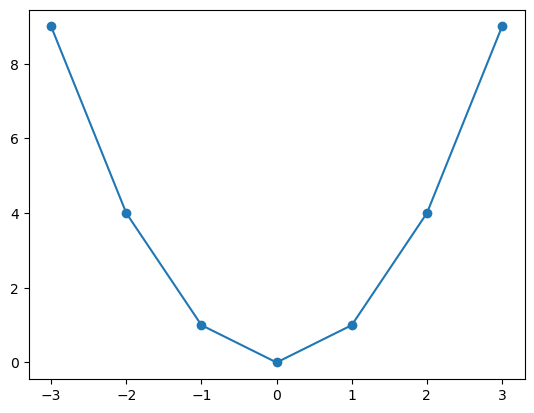

In [102]:
import matplotlib.pyplot as plt

x = np.arange(-3, 4)
y = x**2

plt.plot(x, y, marker='o')

In [93]:
y = 2*4 + 1
y

9